In [1]:
%matplotlib inline
import matplotlib.colors as colors

# Import tvb library.
import tvb.simulator.lab as tvb
from tvb.basic.neotraits.api import Final, List
from tvb.simulator.lab import *
from tvb.datatypes import graph
from tvb.datatypes.time_series import TimeSeriesRegion 
from tvb.analyzers.info import sampen
import tvb.simulator.plot.power_spectra_interactive as ps_int

# Import a bunch of stuff to ease command line usage.
from scipy.stats import entropy, chi2_contingency, circvar, pearsonr, ttest_ind
from scipy import signal
from scipy.signal import butter, lfilter, freqz, hilbert, coherence, filtfilt
from scipy.special import xlogy
import matplotlib.pyplot as plt
import numpy as np
import time as tm
import statistics
import pandas as pd
import seaborn as sns
import scipy.integrate as spi
from mpl_toolkits.mplot3d import Axes3D

import tvb.datatypes.projections as projections

In [2]:
# model parameters for MCI
weightval_mci = 2
aval_mci =0.1112
bval_mci =0.0257
# model parameters for SCD
weightval_scd =1
aval_scd = 0.1055
bval_scd = 0.037
# model parameters for HS
weightval =0.78
aval = 0.1004
bval = 0.0472
# EEG channels considered for the avg
chan=[8,9,30,32,33]

In [3]:
def myfunct_CTR(chan,amplitude,tau):
    
    con =  connectivity.Connectivity.from_file('connectivity_76.zip')

    con.weights[21] = con.weights[21] - np.ones((76)) * weightval
    con.weights[22] = con.weights[22] - np.ones((76)) * weightval   
    con.weights[30] = con.weights[30] - np.ones((76)) * weightval
    con.weights[31] = con.weights[31] - np.ones((76)) * weightval
    con.weights[32] = con.weights[32] - np.ones((76)) * weightval
    con.weights[34] = con.weights[34] - np.ones((76)) * weightval
    con.weights[59] = con.weights[59] - np.ones((76)) * weightval
    con.weights[60] = con.weights[60] - np.ones((76)) * weightval
    con.weights[68] = con.weights[68] - np.ones((76)) * weightval
    con.weights[69] = con.weights[69] - np.ones((76)) * weightval
    con.weights[70] = con.weights[70] - np.ones((76)) * weightval 
    con.weights[72] = con.weights[72] - np.ones((76)) * weightval

    '''con.weights[71] = con.weights[71] - np.ones((76)) * weightval/2
    con.weights[29] = con.weights[29] - np.ones((76)) * weightval/2
    con.weights[28] = con.weights[28] - np.ones((76)) * weightval/2'''



    #And columns:
    con.weights[:,21] = con.weights[:,21] - np.ones((76)) * weightval
    con.weights[:,22] = con.weights[:,22] - np.ones((76)) * weightval
    con.weights[:,30] = con.weights[:,30] - np.ones((76)) * weightval
    con.weights[:,31] = con.weights[:,31] - np.ones((76)) * weightval
    con.weights[:,32] = con.weights[:,32] - np.ones((76)) * weightval
    con.weights[:,34] = con.weights[:,34] - np.ones((76)) * weightval
    con.weights[:,59] = con.weights[:,59] - np.ones((76)) * weightval
    con.weights[:,60] = con.weights[:,60] - np.ones((76)) * weightval
    con.weights[:,68] = con.weights[:,68] - np.ones((76)) * weightval
    con.weights[:,69] = con.weights[:,69] - np.ones((76)) * weightval
    con.weights[:,70] = con.weights[:,70] - np.ones((76)) * weightval
    con.weights[:,72] = con.weights[:,72] - np.ones((76)) * weightval

    '''con.weights[:,71] = con.weights[:,71] - np.ones((76)) * weightval/2
    con.weights[:,29] = con.weights[:,29] - np.ones((76)) * weightval/2
    con.weights[:,28] = con.weights[:,28] - np.ones((76)) * weightval/2'''


    #Adjusting single elements:
    #weightval = 2.5

    #self
    con.weights[21][21] += (2*weightval)
    con.weights[22][22] += (2*weightval)
    con.weights[30][30] += (2*weightval)
    con.weights[31][31] += (2*weightval)
    con.weights[32][32] += (2*weightval)
    con.weights[34][34] += (2*weightval)
    con.weights[59][59] += (2*weightval)
    con.weights[60][60] += (2*weightval)
    con.weights[68][68] += (2*weightval)
    con.weights[69][69] += (2*weightval)
    con.weights[70][70] += (2*weightval)
    con.weights[72][72] += (2*weightval)

    #cross left hemisphere
    con.weights[21][34] += (2*weightval)
    con.weights[21][33] += (2*weightval)
    con.weights[21][16] += (2*weightval)
    con.weights[34][33] += (2*weightval)
    con.weights[34][6]  += (2*weightval)
    con.weights[34][8]  += (2*weightval)
    con.weights[34][16] += (2*weightval)
    con.weights[22][24] += (2*weightval)
    con.weights[22][26] += (2*weightval)
    con.weights[30][9]  += (2*weightval)
    con.weights[30][17] += (2*weightval)
    con.weights[30][27] += (2*weightval)
    con.weights[30][17] += (2*weightval)
    con.weights[31][8]  += (2*weightval)
    con.weights[31][10] += (2*weightval)
    con.weights[31][11] += (2*weightval)
    con.weights[32][9]  += (2*weightval)
    con.weights[32][29] += (2*weightval)

    con.weights[34][21] += (2*weightval)
    con.weights[31][21] += (2*weightval)
    con.weights[16][21] += (2*weightval)
    con.weights[33][34] += (2*weightval)
    con.weights[6][34]  += (2*weightval)
    con.weights[8][34]  += (2*weightval)
    con.weights[16][34] += (2*weightval)
    con.weights[24][22] += (2*weightval)
    con.weights[26][22] += (2*weightval)
    con.weights[9][30]  += (2*weightval)
    con.weights[17][30] += (2*weightval)
    con.weights[27][30] += (2*weightval)
    con.weights[17][30] += (2*weightval)
    con.weights[8][31]  += (2*weightval)
    con.weights[10][31] += (2*weightval)
    con.weights[11][31] += (2*weightval)
    con.weights[9][32]  += (2*weightval)
    con.weights[29][32] += (2*weightval)

    #cross right hemisphere
    con.weights[59][44] += (2*weightval)
    con.weights[59][46] += (2*weightval)
    con.weights[59][48] += (2*weightval)
    con.weights[59][58] += (2*weightval)
    con.weights[59][44] += (2*weightval)
    con.weights[59][70] += (2*weightval)
    con.weights[60][58] += (2*weightval)
    con.weights[68][39] += (2*weightval)
    con.weights[68][47] += (2*weightval)
    con.weights[68][49] += (2*weightval)
    con.weights[68][69] += (2*weightval)
    con.weights[68][71] += (2*weightval)
    con.weights[68][72] += (2*weightval)
    con.weights[69][47] += (2*weightval)
    con.weights[69][62] += (2*weightval)
    con.weights[69][74] += (2*weightval)
    con.weights[70][40] += (2*weightval)
    con.weights[70][46] += (2*weightval)
    con.weights[70][48] += (2*weightval)
    con.weights[70][49] += (2*weightval)
    con.weights[72][47] += (2*weightval)
    con.weights[72][74] += (2*weightval)

    con.weights[44][59] += (2*weightval)
    con.weights[46][59] += (2*weightval)
    con.weights[48][59] += (2*weightval)
    con.weights[58][59] += (2*weightval)
    con.weights[44][59] += (2*weightval)
    con.weights[70][59] += (2*weightval)
    con.weights[58][60] += (2*weightval)
    con.weights[39][68] += (2*weightval)
    con.weights[47][68] += (2*weightval)
    con.weights[49][68] += (2*weightval)
    con.weights[69][68] += (2*weightval)
    con.weights[71][68] += (2*weightval)
    con.weights[72][68] += (2*weightval)
    con.weights[47][69] += (2*weightval)
    con.weights[62][69] += (2*weightval)
    con.weights[74][69] += (2*weightval)
    con.weights[40][70] += (2*weightval)
    con.weights[46][70] += (2*weightval)
    con.weights[48][70] += (2*weightval)
    con.weights[49][70] += (2*weightval)
    con.weights[47][72] += (2*weightval)
    con.weights[74][72] += (2*weightval)

    #adjust the tract lenghts between nodes in rows:
    con.tract_lengths[21,:] = con.tract_lengths[21,:]*1.2
    con.tract_lengths[22,:] = con.tract_lengths[22,:]*1.2
    con.tract_lengths[30,:] = con.tract_lengths[30,:]*1.2
    con.tract_lengths[31,:] = con.tract_lengths[31,:]*1.2
    con.tract_lengths[32,:] = con.tract_lengths[32,:]*1.2
    con.tract_lengths[34,:] = con.tract_lengths[34,:]*1.2
    con.tract_lengths[59,:] = con.tract_lengths[59,:]*1.2
    con.tract_lengths[60,:] = con.tract_lengths[60,:]*1.2
    con.tract_lengths[68,:] = con.tract_lengths[68,:]*1.2
    con.tract_lengths[69,:] = con.tract_lengths[69,:]*1.2
    con.tract_lengths[70,:] = con.tract_lengths[70,:]*1.2
    con.tract_lengths[72,:] = con.tract_lengths[72,:]*1.2

    #And columns
    con.tract_lengths[:,21] = con.tract_lengths[:,21]*1.2
    con.tract_lengths[:,22] = con.tract_lengths[:,22]*1.2
    con.tract_lengths[:,30] = con.tract_lengths[:,30]*1.2
    con.tract_lengths[:,31] = con.tract_lengths[:,31]*1.2
    con.tract_lengths[:,32] = con.tract_lengths[:,32]*1.2
    con.tract_lengths[:,34] = con.tract_lengths[:,34]*1.2
    con.tract_lengths[:,59] = con.tract_lengths[:,59]*1.2
    con.tract_lengths[:,60] = con.tract_lengths[:,60]*1.2
    con.tract_lengths[:,68] = con.tract_lengths[:,68]*1.2
    con.tract_lengths[:,69] = con.tract_lengths[:,69]*1.2
    con.tract_lengths[:,70] = con.tract_lengths[:,70]*1.2
    con.tract_lengths[:,72] = con.tract_lengths[:,72]*1.2




    con.weights = con.weights / np.max(con.weights)              #normalised by maximum weight  
    con.speed = np.array([np.inf])                               #no time delays => velocity ->∞
    con.configure()


    b = np.ones(76)*0.048
    b [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * bval

    B = np.ones(76)*22
    B [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * 20

    J = np.ones(76)*135
    J [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * 135

    a_4 = np.ones(76)*0.25
    a_4 [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]] = np.ones((12))*23

    a_3 = np.ones(76)*0.25
    a_3 [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]] = np.ones((12))*22

    # setup model based on paper's parameters
    model_pars = dict(
        A= 3.25,#3.25, # increased in respect to the healthy case
        B=B,
        v0=6.0,
        a=aval, # increased in respect to the healthy case. (also remember that TVB uses ms, not s)
        b=bval,
        r=0.56,
        nu_max=0.0025, # e0 in the JR original paper
        # TVB factors C_i into J*a_i, e.g. C1 = a_1 * J
        J=135,
        a_1=1.0,
        a_2=0.8,
        a_3= 0.25, #0.25,
        a_4= 0.25, #0.25,
        mu=0.22, # avg of 120 and 320 pulses/s
    )

    # implement JR + afferent PSP
    class JRPSP(tvb.models.JansenRit):
        state_variable_range = Final(
            default={"y0": np.array([-1.0, 1.0]),
                     "y1": np.array([-500.0, 500.0]),
                     "y2": np.array([-50.0, 50.0]),
                     "y3": np.array([-6.0, 6.0]),
                     "y4": np.array([-20.0, 20.0]),
                     "y5": np.array([-500.0, 500.0]),
                     "y6": np.array([-20.0, 20.0]),
                     "y7": np.array([-500.0, 500.0])})

        variables_of_interest = List(
            of=str,
            label="Variables watched by Monitors",
            choices=("y0", "y1", "y2", "y3", "y4", "y5", "y6", "y7"),
            default=("y0", "y1", "y2", "y3"))

        state_variables = tuple('y0 y1 y2 y3 y4 y5 y6 y7'.split())
        _nvar = 8
        cvar = np.array([6], dtype=np.int32)

        def dfun(self, state_variables, coupling, local_coupling=0.0):
            dy = np.zeros((8, state_variables.shape[1], 1))
            # TVB's JR is eq 6 only
            dy[:6] = super().dfun(state_variables[:6], coupling, local_coupling)
            # tack on PSP for efferent following eq 8
            # NB with this, only y12 is coupling var for TVB
            y0, y1, y2, y3, y4, y5, y6, y7 = state_variables
            a_d = self.a / 3.0
            sigm_y1_y2 = 2.0 * self.nu_max / (1.0 + np.exp(self.r * (self.v0 - (y1 - y2))))
            dy[6] = y7
            dy[7] = self.A * a_d * sigm_y1_y2 - 2.0 * a_d * y7 - self.a**2 * y6
            return dy

    # factor out noise from dy4 = A a (p(t) + ...) as y4 += dt (...) + A a dW_t
    # this allows us to model the noise as TVB does it, though scaling requires experiment


    nsig = np.zeros((8, 76, 1))
    nsig[4] = model_pars['A'] * model_pars['a'] * (.320 - .120) * 5e-3
    noise = tvb.noise.Additive(nsig=nsig)



    rm = region_mapping.RegionMapping.from_file()

    #Initialise some Monitors with period in physical time
    mon_tavg = monitors.TemporalAverage(period=1.)
    mon_EEG = monitors.EEG.from_file()
    mon_EEG.region_mapping=rm
    mon_EEG.period=1. 

    what_to_watch = (mon_tavg, mon_EEG)


    nodes = [35, 36, 73,74] 
    stim_weights = np.zeros((con.number_of_regions, 1))
    stim_weights[nodes] = np.array([3.5,0.0,3.5,0.0])[:, np.newaxis]
    eqn_t = equations.PulseTrain()
    eqn_t.parameters["onset"] = 500.0 # ms
    eqn_t.parameters["tau"]   = tau  # ms
    eqn_t.parameters["T"]     = 1500  # 0.002kHz repetition frequency
    eqn_t.parameters["amp"]   = amplitude

    stimulus = patterns.StimuliRegion(temporal = eqn_t,
                                      connectivity = con, 
                                      weight = stim_weights)


    # Initialise the Simulator.
    sim = simulator.Simulator(connectivity=con,
                              conduction_speed=np.float(con.speed),
                              model=JRPSP(
                              variables_of_interest=("y0", "y1", "y2", "y3", "y4", "y5", "y6", "y7"),
                              **{k: np.array(v) for k, v in model_pars.items()}),
                              coupling=tvb.coupling.Linear(a=np.r_[aval*10]),
                              integrator=tvb.integrators.EulerStochastic(dt=0.1, noise=noise),
                              #coupling=coupling.SigmoidalJansenRit(a=numpy.array([10.0])),
                              #integrator=integrators.HeunStochastic(dt=2 ** -4, noise=noise.Additive(nsig=sigma)),
                              #monitors=(monitors.TemporalAverage(period=1),), #period in ms
                              monitors=what_to_watch,
                              stimulus = stimulus,
                              simulation_length=1500)
    sim.configure()

    sim_time = 1500
    (ttavg_hc, tavg_hc), (teeg_hc, eeg_hc) = sim.run(simulation_length=sim_time)


    tavg_hc_whole = tavg_hc.copy()
    eeg_hc_whole = eeg_hc.copy() 

    tavg_hc_mask = tavg_hc[1000:, :, :, :]
    eeg_hc_mask = eeg_hc[1000:, :, :, :]




    tavg_hc /= (np.max(tavg_hc,0) - np.min(tavg_hc,0 ))
    tavg_hc -= np.mean(tavg_hc, 0)
    eeg_hc /= (np.max(eeg_hc,0) - np.min(eeg_hc,0 ))
    eeg_hc -= np.mean(eeg_hc, 0)
    
    


    avg=[]
    m_eeg_hc= eeg_hc[:,0,chan,0]
    avg= m_eeg_hc.mean(1)
    #print(avg)
    
    
    mask= np.arange(550,600)
    integral= spi.simpson(np.squeeze(avg[mask]),mask)
    
    min_eeg=np.min(np.squeeze(avg[mask]))
    argmin_eeg = np.argmin(np.squeeze(avg[mask]))

    #m_eeg_hc= eeg_hc[:,0,chan,0]
    mon_EEG = monitors.EEG.from_file()

    return [round(integral, 4),avg,min_eeg,argmin_eeg,ttavg_hc,tavg_hc[:, 0,35, 0]]


In [4]:
def myfunct_SCD(chan,amplitude,tau):

    # Initialise the Connectivity.
    con = connectivity.Connectivity.from_file('connectivity_76.zip') 


    # Setting adjusted connectivity in rows:
    con.weights[21] = con.weights[21] - np.ones((76)) * weightval_scd
    con.weights[22] = con.weights[22] - np.ones((76)) * weightval_scd
    con.weights[30] = con.weights[30] - np.ones((76)) * weightval_scd
    con.weights[31] = con.weights[31] - np.ones((76)) * weightval_scd
    con.weights[32] = con.weights[32] - np.ones((76)) * weightval_scd
    con.weights[34] = con.weights[34] - np.ones((76)) * weightval_scd
    con.weights[59] = con.weights[59] - np.ones((76)) * weightval_scd
    con.weights[60] = con.weights[60] - np.ones((76)) * weightval_scd
    con.weights[68] = con.weights[68] - np.ones((76)) * weightval_scd
    con.weights[69] = con.weights[69] - np.ones((76)) * weightval_scd
    con.weights[70] = con.weights[70] - np.ones((76)) * weightval_scd 
    con.weights[72] = con.weights[72] - np.ones((76)) * weightval_scd

    '''con.weights[71] = con.weights[71] - np.ones((76)) * weightval_scd/2
    con.weights[29] = con.weights[29] - np.ones((76)) * weightval_scd/2
    con.weights[28] = con.weights[28] - np.ones((76)) * weightval_scd/2'''



    #And columns:
    con.weights[:,21] = con.weights[:,21] - np.ones((76)) * weightval_scd
    con.weights[:,22] = con.weights[:,22] - np.ones((76)) * weightval_scd
    con.weights[:,30] = con.weights[:,30] - np.ones((76)) * weightval_scd
    con.weights[:,31] = con.weights[:,31] - np.ones((76)) * weightval_scd
    con.weights[:,32] = con.weights[:,32] - np.ones((76)) * weightval_scd
    con.weights[:,34] = con.weights[:,34] - np.ones((76)) * weightval_scd
    con.weights[:,59] = con.weights[:,59] - np.ones((76)) * weightval_scd
    con.weights[:,60] = con.weights[:,60] - np.ones((76)) * weightval_scd
    con.weights[:,68] = con.weights[:,68] - np.ones((76)) * weightval_scd
    con.weights[:,69] = con.weights[:,69] - np.ones((76)) * weightval_scd
    con.weights[:,70] = con.weights[:,70] - np.ones((76)) * weightval_scd
    con.weights[:,72] = con.weights[:,72] - np.ones((76)) * weightval_scd

    '''con.weights[:,71] = con.weights[:,71] - np.ones((76)) * weightval_scd/2
    con.weights[:,29] = con.weights[:,29] - np.ones((76)) * weightval_scd/2
    con.weights[:,28] = con.weights[:,28] - np.ones((76)) * weightval_scd/2'''


    #Adjusting single elements:
    #weightval_scd = 1.07

    #self
    con.weights[21][21] += (2*weightval_scd)
    con.weights[22][22] += (2*weightval_scd)
    con.weights[30][30] += (2*weightval_scd)
    con.weights[31][31] += (2*weightval_scd)
    con.weights[32][32] += (2*weightval_scd)
    con.weights[34][34] += (2*weightval_scd)
    con.weights[59][59] += (2*weightval_scd)
    con.weights[60][60] += (2*weightval_scd)
    con.weights[68][68] += (2*weightval_scd)
    con.weights[69][69] += (2*weightval_scd)
    con.weights[70][70] += (2*weightval_scd)
    con.weights[72][72] += (2*weightval_scd)

    #cross left hemisphere
    con.weights[21][34] += (2*weightval_scd)
    con.weights[21][33] += (2*weightval_scd)
    con.weights[21][16] += (2*weightval_scd)
    con.weights[34][33] += (2*weightval_scd)
    con.weights[34][6]  += (2*weightval_scd)
    con.weights[34][8]  += (2*weightval_scd)
    con.weights[34][16] += (2*weightval_scd)
    con.weights[22][24] += (2*weightval_scd)
    con.weights[22][26] += (2*weightval_scd)
    con.weights[30][9]  += (2*weightval_scd)
    con.weights[30][17] += (2*weightval_scd)
    con.weights[30][27] += (2*weightval_scd)
    con.weights[30][17] += (2*weightval_scd)
    con.weights[31][8]  += (2*weightval_scd)
    con.weights[31][10] += (2*weightval_scd)
    con.weights[31][11] += (2*weightval_scd)
    con.weights[32][9]  += (2*weightval_scd)
    con.weights[32][29] += (2*weightval_scd)

    con.weights[34][21] += (2*weightval_scd)
    con.weights[31][21] += (2*weightval_scd)
    con.weights[16][21] += (2*weightval_scd)
    con.weights[33][34] += (2*weightval_scd)
    con.weights[6][34]  += (2*weightval_scd)
    con.weights[8][34]  += (2*weightval_scd)
    con.weights[16][34] += (2*weightval_scd)
    con.weights[24][22] += (2*weightval_scd)
    con.weights[26][22] += (2*weightval_scd)
    con.weights[9][30]  += (2*weightval_scd)
    con.weights[17][30] += (2*weightval_scd)
    con.weights[27][30] += (2*weightval_scd)
    con.weights[17][30] += (2*weightval_scd)
    con.weights[8][31]  += (2*weightval_scd)
    con.weights[10][31] += (2*weightval_scd)
    con.weights[11][31] += (2*weightval_scd)
    con.weights[9][32]  += (2*weightval_scd)
    con.weights[29][32] += (2*weightval_scd)

    #cross right hemisphere
    con.weights[59][44] += (2*weightval_scd)
    con.weights[59][46] += (2*weightval_scd)
    con.weights[59][48] += (2*weightval_scd)
    con.weights[59][58] += (2*weightval_scd)
    con.weights[59][44] += (2*weightval_scd)
    con.weights[59][70] += (2*weightval_scd)
    con.weights[60][58] += (2*weightval_scd)
    con.weights[68][39] += (2*weightval_scd)
    con.weights[68][47] += (2*weightval_scd)
    con.weights[68][49] += (2*weightval_scd)
    con.weights[68][69] += (2*weightval_scd)
    con.weights[68][71] += (2*weightval_scd)
    con.weights[68][72] += (2*weightval_scd)
    con.weights[69][47] += (2*weightval_scd)
    con.weights[69][62] += (2*weightval_scd)
    con.weights[69][74] += (2*weightval_scd)
    con.weights[70][40] += (2*weightval_scd)
    con.weights[70][46] += (2*weightval_scd)
    con.weights[70][48] += (2*weightval_scd)
    con.weights[70][49] += (2*weightval_scd)
    con.weights[72][47] += (2*weightval_scd)
    con.weights[72][74] += (2*weightval_scd)

    con.weights[44][59] += (2*weightval_scd)
    con.weights[46][59] += (2*weightval_scd)
    con.weights[48][59] += (2*weightval_scd)
    con.weights[58][59] += (2*weightval_scd)
    con.weights[44][59] += (2*weightval_scd)
    con.weights[70][59] += (2*weightval_scd)
    con.weights[58][60] += (2*weightval_scd)
    con.weights[39][68] += (2*weightval_scd)
    con.weights[47][68] += (2*weightval_scd)
    con.weights[49][68] += (2*weightval_scd)
    con.weights[69][68] += (2*weightval_scd)
    con.weights[71][68] += (2*weightval_scd)
    con.weights[72][68] += (2*weightval_scd)
    con.weights[47][69] += (2*weightval_scd)
    con.weights[62][69] += (2*weightval_scd)
    con.weights[74][69] += (2*weightval_scd)
    con.weights[40][70] += (2*weightval_scd)
    con.weights[46][70] += (2*weightval_scd)
    con.weights[48][70] += (2*weightval_scd)
    con.weights[49][70] += (2*weightval_scd)
    con.weights[47][72] += (2*weightval_scd)
    con.weights[74][72] += (2*weightval_scd)

    #adjust the tract lenghts between nodes in rows:
    con.tract_lengths[21,:] = con.tract_lengths[21,:]*1.2
    con.tract_lengths[22,:] = con.tract_lengths[22,:]*1.2
    con.tract_lengths[30,:] = con.tract_lengths[30,:]*1.2
    con.tract_lengths[31,:] = con.tract_lengths[31,:]*1.2
    con.tract_lengths[32,:] = con.tract_lengths[32,:]*1.2
    con.tract_lengths[34,:] = con.tract_lengths[34,:]*1.2
    con.tract_lengths[59,:] = con.tract_lengths[59,:]*1.2
    con.tract_lengths[60,:] = con.tract_lengths[60,:]*1.2
    con.tract_lengths[68,:] = con.tract_lengths[68,:]*1.2
    con.tract_lengths[69,:] = con.tract_lengths[69,:]*1.2
    con.tract_lengths[70,:] = con.tract_lengths[70,:]*1.2
    con.tract_lengths[72,:] = con.tract_lengths[72,:]*1.2

    #And columns
    con.tract_lengths[:,21] = con.tract_lengths[:,21]*1.2
    con.tract_lengths[:,22] = con.tract_lengths[:,22]*1.2
    con.tract_lengths[:,30] = con.tract_lengths[:,30]*1.2
    con.tract_lengths[:,31] = con.tract_lengths[:,31]*1.2
    con.tract_lengths[:,32] = con.tract_lengths[:,32]*1.2
    con.tract_lengths[:,34] = con.tract_lengths[:,34]*1.2
    con.tract_lengths[:,59] = con.tract_lengths[:,59]*1.2
    con.tract_lengths[:,60] = con.tract_lengths[:,60]*1.2
    con.tract_lengths[:,68] = con.tract_lengths[:,68]*1.2
    con.tract_lengths[:,69] = con.tract_lengths[:,69]*1.2
    con.tract_lengths[:,70] = con.tract_lengths[:,70]*1.2
    con.tract_lengths[:,72] = con.tract_lengths[:,72]*1.2



    np.matrix.clip(con.weights, 0, 3, out=con.weights)




    #nregions = len(con.region_labels)
    #con.weights = con.weights - con.weights * np.eye((nregions)) #remove self-connection


    con.weights = con.weights / np.max(con.weights)              #normalised by maximum weight  
    con.speed = np.array([np.inf])                               #no time delays => velocity ->∞
    con.configure()


    b = np.ones(76)*0.048
    b [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * bval_scd

    B = np.ones(76)*22
    #B [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * 20

    J = np.ones(76)*135
    J [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * 135

    a_4 = np.ones(76)*0.25
    #a_4 [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]] = np.ones((12))*23

    a_3 = np.ones(76)*0.25
    #a_3 [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]] = np.ones((12))*22

    # setup model based on paper's parameters
    model_pars = dict(
        A=3.25, # increased in respect to the healthy case
        B=B,
        v0=6.0,
        a=aval_scd, # increased in respect to the healthy case. (also remember that TVB uses ms, not s)
        b=b,
        r=0.56,
        nu_max=0.0025, # e0 in the JR original paper
        # TVB factors C_i into J*a_i, e.g. C1 = a_1 * J
        J=135,
        a_1=1.0,
        a_2=0.8,
        a_3= 0.25,
        a_4= 0.25,
        mu=0.22, # avg of 120 and 320 pulses/s
    )

    # implement JR + afferent PSP
    class JRPSP(tvb.models.JansenRit):
        state_variable_range = Final(
            default={"y0": np.array([-1.0, 1.0]),
                     "y1": np.array([-500.0, 500.0]),
                     "y2": np.array([-50.0, 50.0]),
                     "y3": np.array([-6.0, 6.0]),
                     "y4": np.array([-20.0, 20.0]),
                     "y5": np.array([-500.0, 500.0]),
                     "y6": np.array([-20.0, 20.0]),
                     "y7": np.array([-500.0, 500.0])})

        variables_of_interest = List(
            of=str,
            label="Variables watched by Monitors",
            choices=("y0", "y1", "y2", "y3", "y4", "y5", "y6", "y7"),
            default=("y0", "y1", "y2", "y3"))

        state_variables = tuple('y0 y1 y2 y3 y4 y5 y6 y7'.split())
        _nvar = 8
        cvar = np.array([6], dtype=np.int32)

        def dfun(self, state_variables, coupling, local_coupling=0.0):
            dy = np.zeros((8, state_variables.shape[1], 1))
            # TVB's JR is eq 6 only
            dy[:6] = super().dfun(state_variables[:6], coupling, local_coupling)
            # tack on PSP for efferent following eq 8
            # NB with this, only y12 is coupling var for TVB
            y0, y1, y2, y3, y4, y5, y6, y7 = state_variables
            a_d = self.a / 3.0
            sigm_y1_y2 = 2.0 * self.nu_max / (1.0 + np.exp(self.r * (self.v0 - (y1 - y2))))
            dy[6] = y7
            dy[7] = self.A * a_d * sigm_y1_y2 - 2.0 * a_d * y7 - self.a**2 * y6
            return dy

    # factor out noise from dy4 = A a (p(t) + ...) as y4 += dt (...) + A a dW_t
    # this allows us to model the noise as TVB does it, though scaling requires experiment
    nsig = np.zeros((8, 76, 1))
    nsig[4] = model_pars['A'] * model_pars['a'] * (.320 - .120) * 5e-3
    noise = tvb.noise.Additive(nsig=nsig)




    #setting up monitors:
    mon_tavg = monitors.TemporalAverage(period=1.)
    mon_EEG = monitors.EEG.from_file()
    mon_EEG.period=1. 


    #Bundling
    what_to_watch = (mon_tavg, mon_EEG)

    #Bundling
    what_to_watch = (mon_tavg, mon_EEG)

    nodes = [35, 36,73,74] 
    stim_weights = np.zeros((con.number_of_regions, 1))
    stim_weights[nodes] = np.array([3.5, 0.0,3.5,0.0])[:, np.newaxis]
    eqn_t = equations.PulseTrain()
    eqn_t.parameters["onset"] = 500.0 # ms
    eqn_t.parameters["tau"]   = tau  #20 ms
    eqn_t.parameters["T"]     = 1500.  # 0.002kHz repetition frequency
    eqn_t.parameters["amp"]   = amplitude


    #eqn_t1 = equations.Sinusoid()
    #eqn_t1.parameters["amp"]= 0.1

    stimulus = patterns.StimuliRegion(temporal = eqn_t,
                                      connectivity = con, 
                                      weight = stim_weights)

    sim = simulator.Simulator(connectivity=con,
                              conduction_speed=np.float(con.speed),
                              model=JRPSP(
                              variables_of_interest=("y0", "y1", "y2", "y3", "y4", "y5", "y6", "y7"),
                              **{k: np.array(v) for k, v in model_pars.items()}),
                              coupling=tvb.coupling.Linear(a=np.r_[aval_scd*10]),
                              integrator=tvb.integrators.EulerStochastic(dt=0.1, noise=noise),
                              #coupling=coupling.SigmoidalJansenRit(a=numpy.array([10.0])),
                              #integrator=integrators.HeunStochastic(dt=2 ** -4, noise=noise.Additive(nsig=sigma)),
                              #monitors=(monitors.TemporalAverage(period=1),), #period in ms
                              monitors=what_to_watch,
                              stimulus = stimulus,
                              simulation_length=1500)
    sim.configure()

    sim_time = 1500
    (ttavg_scd, tavg_scd), (teeg_scd, eeg_scd) = sim.run(simulation_length=sim_time)


    tavg_scd_whole = tavg_scd.copy()
    eeg_scd_whole = eeg_scd.copy() 

    tavg_scd_mask = tavg_scd[1000:, :, :, :]
    eeg_scd_mask = eeg_scd[1000:, :, :, :]




    tavg_scd /= (np.max(tavg_scd,0) - np.min(tavg_scd,0 ))
    tavg_scd -= np.mean(tavg_scd, 0)
    eeg_scd /= (np.max(eeg_scd,0) - np.min(eeg_scd,0 ))
    eeg_scd -= np.mean(eeg_scd, 0)




    avg =[]
    m_eeg_scd=eeg_scd[:,0,chan,0]
    avg= m_eeg_scd.mean(1)
    #print(avg)
    
    mask= np.arange(550,600)
    integral= spi.simpson(np.squeeze(avg[mask]),mask)
    
    min_eeg=np.min(np.squeeze(avg[mask]))
    argmin_eeg = np.argmin(np.squeeze(avg[mask]))

    #m_eeg_hc= eeg_hc[:,0,chan,0]
    mon_EEG = monitors.EEG.from_file()

    return [round(integral, 4),avg,min_eeg,argmin_eeg,ttavg_scd,tavg_scd[:, 0,35, 0]]


In [5]:
def myfunct_MCI(chan,amplitude,tau):
    

    # Initialise the Connectivity.
    con = connectivity.Connectivity.from_file('connectivity_76.zip') 






    # Setting adjusted connectivity in rows:
    con.weights[21] = con.weights[21] - np.ones((76)) * weightval_mci
    con.weights[22] = con.weights[22] - np.ones((76)) * weightval_mci
    con.weights[30] = con.weights[30] - np.ones((76)) * weightval_mci
    con.weights[31] = con.weights[31] - np.ones((76)) * weightval_mci
    con.weights[32] = con.weights[32] - np.ones((76)) * weightval_mci
    con.weights[34] = con.weights[34] - np.ones((76)) * weightval_mci
    con.weights[59] = con.weights[59] - np.ones((76)) * weightval_mci
    con.weights[60] = con.weights[60] - np.ones((76)) * weightval_mci
    con.weights[68] = con.weights[68] - np.ones((76)) * weightval_mci
    con.weights[69] = con.weights[69] - np.ones((76)) * weightval_mci
    con.weights[70] = con.weights[70] - np.ones((76)) * weightval_mci 
    con.weights[72] = con.weights[72] - np.ones((76)) * weightval_mci

    '''con.weights[71] = con.weights[71] - np.ones((76)) * weightval_mci/2
    con.weights[29] = con.weights[29] - np.ones((76)) * weightval_mci/2
    con.weights[28] = con.weights[28] - np.ones((76)) * weightval_mci/2'''



    #And columns:
    con.weights[:,21] = con.weights[:,21] - np.ones((76)) * weightval_mci
    con.weights[:,22] = con.weights[:,22] - np.ones((76)) * weightval_mci
    con.weights[:,30] = con.weights[:,30] - np.ones((76)) * weightval_mci
    con.weights[:,31] = con.weights[:,31] - np.ones((76)) * weightval_mci
    con.weights[:,32] = con.weights[:,32] - np.ones((76)) * weightval_mci
    con.weights[:,34] = con.weights[:,34] - np.ones((76)) * weightval_mci
    con.weights[:,59] = con.weights[:,59] - np.ones((76)) * weightval_mci
    con.weights[:,60] = con.weights[:,60] - np.ones((76)) * weightval_mci
    con.weights[:,68] = con.weights[:,68] - np.ones((76)) * weightval_mci
    con.weights[:,69] = con.weights[:,69] - np.ones((76)) * weightval_mci
    con.weights[:,70] = con.weights[:,70] - np.ones((76)) * weightval_mci
    con.weights[:,72] = con.weights[:,72] - np.ones((76)) * weightval_mci

    '''con.weights[:,71] = con.weights[:,71] - np.ones((76)) * weightval_mci/2
    con.weights[:,29] = con.weights[:,29] - np.ones((76)) * weightval_mci/2
    con.weights[:,28] = con.weights[:,28] - np.ones((76)) * weightval_mci/2'''


    #Adjusting single elements:
    #weightval_mci = 1.07

    #self
    con.weights[21][21] += (2*weightval_mci)
    con.weights[22][22] += (2*weightval_mci)
    con.weights[30][30] += (2*weightval_mci)
    con.weights[31][31] += (2*weightval_mci)
    con.weights[32][32] += (2*weightval_mci)
    con.weights[34][34] += (2*weightval_mci)
    con.weights[59][59] += (2*weightval_mci)
    con.weights[60][60] += (2*weightval_mci)
    con.weights[68][68] += (2*weightval_mci)
    con.weights[69][69] += (2*weightval_mci)
    con.weights[70][70] += (2*weightval_mci)
    con.weights[72][72] += (2*weightval_mci)

    #cross left hemisphere
    con.weights[21][34] += (2*weightval_mci)
    con.weights[21][33] += (2*weightval_mci)
    con.weights[21][16] += (2*weightval_mci)
    con.weights[34][33] += (2*weightval_mci)
    con.weights[34][6]  += (2*weightval_mci)
    con.weights[34][8]  += (2*weightval_mci)
    con.weights[34][16] += (2*weightval_mci)
    con.weights[22][24] += (2*weightval_mci)
    con.weights[22][26] += (2*weightval_mci)
    con.weights[30][9]  += (2*weightval_mci)
    con.weights[30][17] += (2*weightval_mci)
    con.weights[30][27] += (2*weightval_mci)
    con.weights[30][17] += (2*weightval_mci)
    con.weights[31][8]  += (2*weightval_mci)
    con.weights[31][10] += (2*weightval_mci)
    con.weights[31][11] += (2*weightval_mci)
    con.weights[32][9]  += (2*weightval_mci)
    con.weights[32][29] += (2*weightval_mci)

    con.weights[34][21] += (2*weightval_mci)
    con.weights[31][21] += (2*weightval_mci)
    con.weights[16][21] += (2*weightval_mci)
    con.weights[33][34] += (2*weightval_mci)
    con.weights[6][34]  += (2*weightval_mci)
    con.weights[8][34]  += (2*weightval_mci)
    con.weights[16][34] += (2*weightval_mci)
    con.weights[24][22] += (2*weightval_mci)
    con.weights[26][22] += (2*weightval_mci)
    con.weights[9][30]  += (2*weightval_mci)
    con.weights[17][30] += (2*weightval_mci)
    con.weights[27][30] += (2*weightval_mci)
    con.weights[17][30] += (2*weightval_mci)
    con.weights[8][31]  += (2*weightval_mci)
    con.weights[10][31] += (2*weightval_mci)
    con.weights[11][31] += (2*weightval_mci)
    con.weights[9][32]  += (2*weightval_mci)
    con.weights[29][32] += (2*weightval_mci)

    #cross right hemisphere
    con.weights[59][44] += (2*weightval_mci)
    con.weights[59][46] += (2*weightval_mci)
    con.weights[59][48] += (2*weightval_mci)
    con.weights[59][58] += (2*weightval_mci)
    con.weights[59][44] += (2*weightval_mci)
    con.weights[59][70] += (2*weightval_mci)
    con.weights[60][58] += (2*weightval_mci)
    con.weights[68][39] += (2*weightval_mci)
    con.weights[68][47] += (2*weightval_mci)
    con.weights[68][49] += (2*weightval_mci)
    con.weights[68][69] += (2*weightval_mci)
    con.weights[68][71] += (2*weightval_mci)
    con.weights[68][72] += (2*weightval_mci)
    con.weights[69][47] += (2*weightval_mci)
    con.weights[69][62] += (2*weightval_mci)
    con.weights[69][74] += (2*weightval_mci)
    con.weights[70][40] += (2*weightval_mci)
    con.weights[70][46] += (2*weightval_mci)
    con.weights[70][48] += (2*weightval_mci)
    con.weights[70][49] += (2*weightval_mci)
    con.weights[72][47] += (2*weightval_mci)
    con.weights[72][74] += (2*weightval_mci)

    con.weights[44][59] += (2*weightval_mci)
    con.weights[46][59] += (2*weightval_mci)
    con.weights[48][59] += (2*weightval_mci)
    con.weights[58][59] += (2*weightval_mci)
    con.weights[44][59] += (2*weightval_mci)
    con.weights[70][59] += (2*weightval_mci)
    con.weights[58][60] += (2*weightval_mci)
    con.weights[39][68] += (2*weightval_mci)
    con.weights[47][68] += (2*weightval_mci)
    con.weights[49][68] += (2*weightval_mci)
    con.weights[69][68] += (2*weightval_mci)
    con.weights[71][68] += (2*weightval_mci)
    con.weights[72][68] += (2*weightval_mci)
    con.weights[47][69] += (2*weightval_mci)
    con.weights[62][69] += (2*weightval_mci)
    con.weights[74][69] += (2*weightval_mci)
    con.weights[40][70] += (2*weightval_mci)
    con.weights[46][70] += (2*weightval_mci)
    con.weights[48][70] += (2*weightval_mci)
    con.weights[49][70] += (2*weightval_mci)
    con.weights[47][72] += (2*weightval_mci)
    con.weights[74][72] += (2*weightval_mci)

    #adjust the tract lenghts between nodes in rows:
    con.tract_lengths[21,:] = con.tract_lengths[21,:]*1.2
    con.tract_lengths[22,:] = con.tract_lengths[22,:]*1.2
    con.tract_lengths[30,:] = con.tract_lengths[30,:]*1.2
    con.tract_lengths[31,:] = con.tract_lengths[31,:]*1.2
    con.tract_lengths[32,:] = con.tract_lengths[32,:]*1.2
    con.tract_lengths[34,:] = con.tract_lengths[34,:]*1.2
    con.tract_lengths[59,:] = con.tract_lengths[59,:]*1.2
    con.tract_lengths[60,:] = con.tract_lengths[60,:]*1.2
    con.tract_lengths[68,:] = con.tract_lengths[68,:]*1.2
    con.tract_lengths[69,:] = con.tract_lengths[69,:]*1.2
    con.tract_lengths[70,:] = con.tract_lengths[70,:]*1.2
    con.tract_lengths[72,:] = con.tract_lengths[72,:]*1.2

    #And columns
    con.tract_lengths[:,21] = con.tract_lengths[:,21]*1.2
    con.tract_lengths[:,22] = con.tract_lengths[:,22]*1.2
    con.tract_lengths[:,30] = con.tract_lengths[:,30]*1.2
    con.tract_lengths[:,31] = con.tract_lengths[:,31]*1.2
    con.tract_lengths[:,32] = con.tract_lengths[:,32]*1.2
    con.tract_lengths[:,34] = con.tract_lengths[:,34]*1.2
    con.tract_lengths[:,59] = con.tract_lengths[:,59]*1.2
    con.tract_lengths[:,60] = con.tract_lengths[:,60]*1.2
    con.tract_lengths[:,68] = con.tract_lengths[:,68]*1.2
    con.tract_lengths[:,69] = con.tract_lengths[:,69]*1.2
    con.tract_lengths[:,70] = con.tract_lengths[:,70]*1.2
    con.tract_lengths[:,72] = con.tract_lengths[:,72]*1.2



    np.matrix.clip(con.weights, 0, 3, out=con.weights)




    #nregions = len(con.region_labels)
    #con.weights = con.weights - con.weights * np.eye((nregions)) #remove self-connection
    con.weights = con.weights / np.max(con.weights)              #normalised by maximum weight  
    con.speed = np.array([np.inf])                               #no time delays => velocity ->∞
    con.configure()


    b = np.ones(76)*0.048
    b [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * bval_mci

    B = np.ones(76)*22
    #B [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * 20

    J = np.ones(76)*135
    J [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]]  = np.ones((12)) * 135

    a_4 = np.ones(76)*0.25
    #a_4 [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]] = np.ones((12))*23

    a_3 = np.ones(76)*0.25
    #a_3 [[21, 22, 30, 31, 32, 34, 59, 60, 68, 69, 70, 72]] = np.ones((12))*22

    # setup model based on paper's parameters
    model_pars = dict(
        A=3.25, # increased in respect to the healthy case
        B=B,
        v0=6.0,
        a=aval_mci, # increased in respect to the healthy case. (also remember that TVB uses ms, not s)
        b=b,
        r=0.56,
        nu_max=0.0025, # e0 in the JR original paper
        # TVB factors C_i into J*a_i, e.g. C1 = a_1 * J
        J=135,
        a_1=1.0,
        a_2=0.8,
        a_3= 0.25,
        a_4= 0.25, 
        mu=0.22, # avg of 120 and 320 pulses/s
    )



    # implement JR + afferent PSP
    class JRPSP(tvb.models.JansenRit):
        state_variable_range = Final(
            default={"y0": np.array([-1.0, 1.0]),
                     "y1": np.array([-500.0, 500.0]),
                     "y2": np.array([-50.0, 50.0]),
                     "y3": np.array([-6.0, 6.0]),
                     "y4": np.array([-20.0, 20.0]),
                     "y5": np.array([-500.0, 500.0]),
                     "y6": np.array([-20.0, 20.0]),
                     "y7": np.array([-500.0, 500.0])})

        variables_of_interest = List(
            of=str,
            label="Variables watched by Monitors",
            choices=("y0", "y1", "y2", "y3", "y4", "y5", "y6", "y7"),
            default=("y0", "y1", "y2", "y3"))

        state_variables = tuple('y0 y1 y2 y3 y4 y5 y6 y7'.split())
        _nvar = 8
        cvar = np.array([6], dtype=np.int32)

        def dfun(self, state_variables, coupling, local_coupling=0.0):
            dy = np.zeros((8, state_variables.shape[1], 1))
            # TVB's JR is eq 6 only
            dy[:6] = super().dfun(state_variables[:6], coupling, local_coupling)
            # tack on PSP for efferent following eq 8
            # NB with this, only y12 is coupling var for TVB
            y0, y1, y2, y3, y4, y5, y6, y7 = state_variables
            a_d = self.a / 3.0
            sigm_y1_y2 = 2.0 * self.nu_max / (1.0 + np.exp(self.r * (self.v0 - (y1 - y2))))
            dy[6] = y7
            dy[7] = self.A * a_d * sigm_y1_y2 - 2.0 * a_d * y7 - self.a**2 * y6
            return dy

    # factor out noise from dy4 = A a (p(t) + ...) as y4 += dt (...) + A a dW_t
    # this allows us to model the noise as TVB does it, though scaling requires experiment
    nsig = np.zeros((8, 76, 1))
    nsig[4] = model_pars['A'] * model_pars['a'] * (.320 - .120) * 5e-3
    noise = tvb.noise.Additive(nsig=nsig)

    #setting up monitors:
    mon_tavg = monitors.TemporalAverage(period=1.)
    mon_EEG = monitors.EEG.from_file()
    mon_EEG.period=1. 


    #Bundling
    what_to_watch = (mon_tavg, mon_EEG)

    #Bundling
    what_to_watch = (mon_tavg, mon_EEG)



    nodes = [35, 36,73,74] 
    stim_weights = np.zeros((con.number_of_regions, 1))
    stim_weights[nodes] = np.array([3.5, 0.0,3.5,0.0])[:, np.newaxis]
    eqn_t = equations.PulseTrain()
    eqn_t.parameters["onset"] = 500.0 # ms
    eqn_t.parameters["tau"]   = tau  # ms
    eqn_t.parameters["T"]     = 1500  # 0.002kHz repetition frequency
    eqn_t.parameters["amp"]   = amplitude

    stimulus = patterns.StimuliRegion(temporal = eqn_t,
                                      connectivity = con, 
                                      weight = stim_weights)

    sim = simulator.Simulator(connectivity=con,
                              conduction_speed=np.float(con.speed),
                              model=JRPSP(
                              variables_of_interest=("y0", "y1", "y2", "y3", "y4", "y5", "y6", "y7"),
                              **{k: np.array(v) for k, v in model_pars.items()}),
                              coupling=tvb.coupling.Linear(a=np.r_[aval_mci*10]),
                              integrator=tvb.integrators.EulerStochastic(dt=0.1, noise=noise),
                              #coupling=coupling.SigmoidalJansenRit(a=numpy.array([10.0])),
                              #integrator=integrators.HeunStochastic(dt=2 ** -4, noise=noise.Additive(nsig=sigma)),
                              #monitors=(monitors.TemporalAverage(period=1),), #period in ms
                              monitors=what_to_watch,
                              stimulus = stimulus,
                              simulation_length=1500)
    sim.configure()

    sim_time = 1500
    (ttavg_ad, tavg_ad), (teeg_ad, eeg_ad) = sim.run(simulation_length=sim_time)

    # Discarded last seconds to better show on plot, keeping the whole Time Series for later power spectra analysis 
    tavg_ad_whole = tavg_ad.copy()
    eeg_ad_whole = eeg_ad.copy() 

    tavg_ad_mask = tavg_ad[1000:, :, :, :]
    eeg_ad_mask = eeg_ad[1000:, :, :, :]




    tavg_ad /= (np.max(tavg_ad,0) - np.min(tavg_ad,0 ))
    tavg_ad -= np.mean(tavg_ad, 0)
    eeg_ad /= (np.max(eeg_ad,0) - np.min(eeg_ad,0 ))
    eeg_ad -= np.mean(eeg_ad, 0)

    avg= []
    m_eeg_ad= eeg_ad[:,0,chan,0]
    avg= m_eeg_ad.mean(1)
    
    mask= np.arange(550,600)
    integral= spi.simpson(np.squeeze(avg[mask]),mask)
    
    min_eeg=np.min(np.squeeze(avg[mask]))
    argmin_eeg = np.argmin(np.squeeze(avg[mask]))

    #m_eeg_hc= eeg_hc[:,0,chan,0]
    mon_EEG = monitors.EEG.from_file()

    
    return [round(integral, 4),avg,min_eeg,argmin_eeg,ttavg_ad,tavg_ad[:, 0,35, 0]]


In [6]:
def parameters(mat):
    mask=np.logical_and(times>0, times<200)

    integral= spi.simpson(mat[mask],times[mask])
    min_=np.min(np.squeeze(mat[mask]))
    min_time= times[mask][np.argmin(mat[mask])]
 
    
    return[integral,min_, min_time]


## PLOT EMPIRICAL EEG OUTPUT 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

times = np.linspace(-300, 1000, 666)

with open('./ERP_MICHELA.pkl', 'rb') as file:
       ERP = pickle.load(file)

Text(0, 0.5, '[μV]')

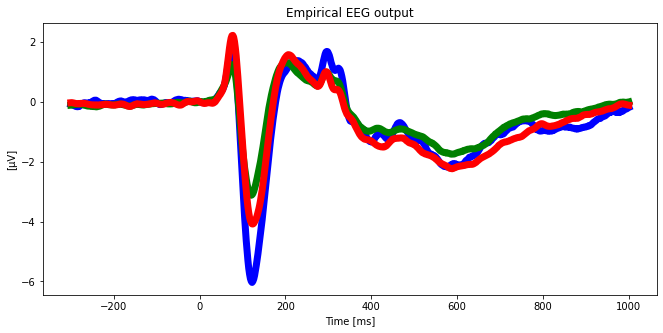

In [8]:
fig,ax= plt.subplots(1,1,figsize= (11,5))
#ax.plt()
ax.plot(times, np.mean(ERP['CTR'], axis=0), 'b', alpha=1, linewidth=7)
ax.plot(times, np.mean(ERP['SCD'], axis=0), 'g', alpha=1, linewidth=7)
ax.plot(times, np.mean(ERP['MCI'], axis=0), 'r', alpha=1, linewidth=7)
ax.set_title('Empirical EEG output')
ax.set_xlabel('Time [ms]')
ax.set_ylabel('[μV]')

In [9]:
res_CTR=parameters(np.mean(ERP['CTR'], axis=0))
res_SCD=parameters(np.mean(ERP['SCD'], axis=0))
res_MCI=parameters(np.mean(ERP['MCI'], axis=0))

## PARAMETER EXPLORATION ON AMPLITUDE AND DURATION OF THE STIMULUS

In [13]:
ampli = np.linspace(0.02,0.5,35)
tau= np.linspace(23,100,35)

In [11]:
min_CTR=[]
min_MCI=[]
min_SCD=[]



min_CTR_tp=[]
min_MCI_tp=[]
min_SCD_tp=[]

k=0
for amp in ampli:
    for t in tau:
        
        min_CTR_tp+=[(myfunct_CTR(chan,amp,t)[2])*100]
        min_SCD_tp+=[(myfunct_SCD(chan,amp,t)[2])*100]
        min_MCI_tp+=[(myfunct_MCI(chan,amp,t)[2])*100]
        
        min_CTR+=[[min_CTR_tp[k],round(amp,3),round(t,3)]]
        min_SCD+=[min_SCD_tp[k],round(amp,3),round(t,3)]
        min_MCI+=[min_MCI_tp[k],round(amp,3),round(t,3)]
        
     
        k+=1

2024-04-03 20:32:55,189 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-04-03 20:32:55,749 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)


<ipython-input-3-b60f1adbf6f7>:287: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conduction_speed=np.float(con.speed),
/home/bbpnrsoa/.local/lib/python3.8/site-packages/numba/np/ufunc/gufunc.py:171: RuntimeWarning: overflow encountered in _numba_dfun_jr
  return self.ufunc(*args, **kwargs)
<ipython-input-3-b60f1adbf6f7>:245: RuntimeWarning: overflow encountered in exp
  sigm_y1_y2 = 2.0 * self.nu_max / (1.0 + np.exp(self.r * (self.v0 - (y1 - y2))))


2024-04-03 20:33:01,646 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-04-03 20:33:01,764 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)


<ipython-input-4-303ef4740473>:300: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conduction_speed=np.float(con.speed),
<ipython-input-4-303ef4740473>:256: RuntimeWarning: overflow encountered in exp
  sigm_y1_y2 = 2.0 * self.nu_max / (1.0 + np.exp(self.r * (self.v0 - (y1 - y2))))


2024-04-03 20:33:07,014 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-04-03 20:33:07,126 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)


<ipython-input-5-d6d8ffa34a2c>:261: RuntimeWarning: overflow encountered in exp
  sigm_y1_y2 = 2.0 * self.nu_max / (1.0 + np.exp(self.r * (self.v0 - (y1 - y2))))


2024-04-03 20:33:12,494 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-04-03 20:33:12,615 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)
2024-04-03 20:33:18,364 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-04-03 20:33:18,481 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)
2024-04-03 20:33:23,966 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-04-03 20:33:24,080 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)
2024-04-03 20:33:29,489 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-04-03 20:33:29,604 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)
2024-04-03 20:33:35,311 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-04-03 20:33:35,428 - INFO - tvb.simulator.monitors - Projection configured gain shape (65, 76)
2024-04-03 20:33:40,920 - WARNING -

In [ ]:
import pickle

# create a Python object
data_min_3 = {'CTR': min_CTR, 'SCD': min_SCD , 'MCI': min_MCI}

# save the object to a .pkl file
with open('data_min_3.pkl', 'wb') as f:
    pickle.dump(data_min_3, f)

In [ ]:
import pickle

# create a Python object
logic_cond_2 = {'cond': logic_order}

# save the object to a .pkl file
with open('logic_cond_2.pkl', 'wb') as f:
    pickle.dump(logic_cond_2, f)

In [10]:
import pickle
with open('./data_min_3.pkl', 'rb') as file:
       data_min_3 = pickle.load(file)

In [ ]:
with open('./data_integral_2.pkl', 'rb') as file:
       data_integral_2 = pickle.load(file)

with open('./difference_2.pkl', 'rb') as file:
       difference_2 = pickle.load(file)

with open('./logic_cond_2.pkl', 'rb') as file:
       logic_cond_2 = pickle.load(file)

In [11]:
save_results_to =  '/home/bbpnrsoa/Tesi/fig/'

In [14]:
df=pd.DataFrame(data=np.array(data_min_3['CTR']).reshape(len(ampli)*len(tau),3), columns=['min value CTR','amplitude', 'tau'])
df


,min value CTR,amplitude,tau
0,-3.846723,0.02,23.000
1,-3.849620,0.02,25.265
2,-3.849727,0.02,27.529
3,-3.816017,0.02,29.794
4,-3.765467,0.02,32.059
...,...,...,...
1220,1.227044,0.50,90.941
1221,1.215742,0.50,93.206
1222,1.215894,0.50,95.471
1223,1.182407,0.50,97.735


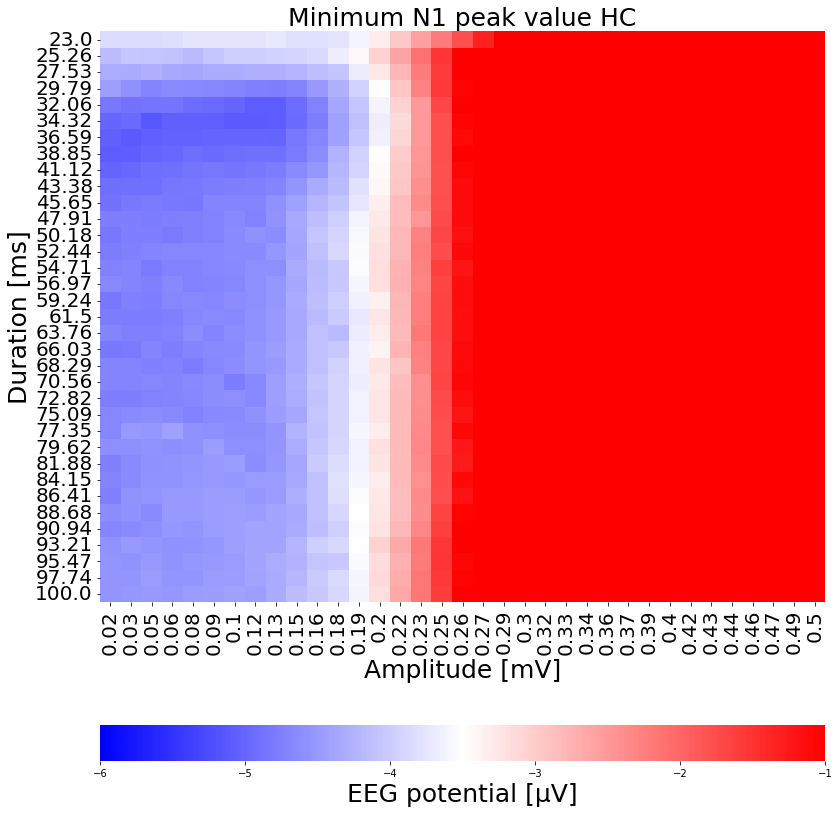

In [20]:
fig, ax = plt.subplots(1,1, figsize=(13, 15))
sns.heatmap(np.asarray(df['min value CTR']).reshape(len(ampli), len(tau)), xticklabels=np.round(ampli,2), yticklabels=np.round(tau,2),ax=ax, cmap='bwr',vmin=-6, vmax=-1,
            cbar_kws = dict(use_gridspec=False,location="bottom"))
            
ax.set_title('Minimum N1 peak value HC',fontsize=25)

ax.set_xlabel('Amplitude [mV]',fontsize=25)
ax.set_ylabel('Duration [ms]',fontsize=25)
ax.collections[0].colorbar.set_label('EEG potential [μV]',fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)





fig.savefig(save_results_to +'min new hc.png')


In [16]:
df1=pd.DataFrame(data=np.array(data_min_3['SCD']).reshape(len(ampli)*len(tau),3), columns=['min value SCD','amplitude', 'tau'])
df1


,min value SCD,amplitude,tau
0,-0.193450,0.02,23.000
1,-0.195418,0.02,25.265
2,-0.199346,0.02,27.529
3,-0.202430,0.02,29.794
4,-0.204622,0.02,32.059
...,...,...,...
1220,-0.090724,0.50,90.941
1221,-0.093045,0.50,93.206
1222,-0.095171,0.50,95.471
1223,-0.097419,0.50,97.735


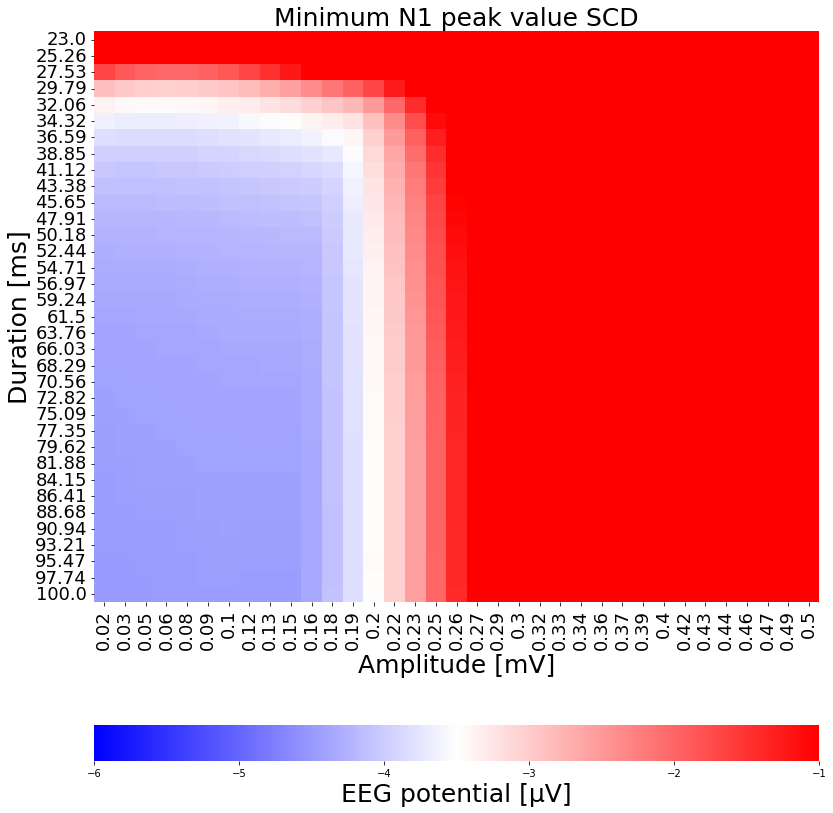

In [19]:
fig, ax = plt.subplots(1,1, figsize=(13, 15))

sns.heatmap(data=np.asarray(df1['min value SCD']).reshape(len(ampli), len(tau)), xticklabels=np.round(ampli,2), yticklabels=np.round(tau,2),ax=ax, cmap='bwr',vmin=-6, vmax=-1,
            cbar_kws = dict(use_gridspec=False,location="bottom"))
ax.set_title('Minimum N1 peak value SCD',fontsize=25)
ax.set_xlabel('Amplitude [mV]',fontsize=25)
ax.set_ylabel('Duration [ms]',fontsize=25)
ax.collections[0].colorbar.set_label('EEG potential [μV]',fontsize=25)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)





fig.savefig(save_results_to +'min new scd.png')


In [22]:
df2=pd.DataFrame(data=np.array(data_min_3['MCI']).reshape(len(ampli)*len(tau),3), columns=['min value MCI','amplitude', 'tau'])
df2

,min value MCI,amplitude,tau
0,-0.571700,0.02,23.000
1,-0.600489,0.02,25.265
2,-0.649568,0.02,27.529
3,-0.699112,0.02,29.794
4,-0.744637,0.02,32.059
...,...,...,...
1220,-0.876835,0.50,90.941
1221,-0.874721,0.50,93.206
1222,-0.872864,0.50,95.471
1223,-0.871048,0.50,97.735


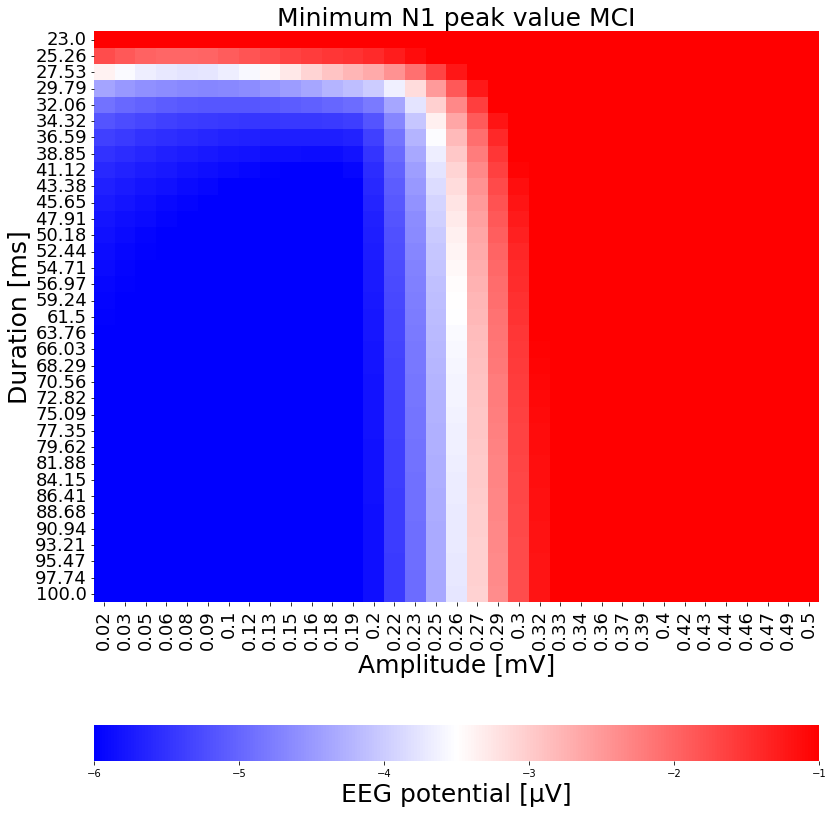

In [23]:
fig, ax = plt.subplots(1,1, figsize=(13, 15))
 
sns.heatmap(data=np.asarray(df2['min value MCI']).reshape(len(ampli), len(tau)), xticklabels=np.round(ampli,2), yticklabels=np.round(tau,2),ax=ax, cmap='bwr',vmin=-6, vmax=-1,
            cbar_kws = dict(use_gridspec=False,location="bottom"))
ax.set_title('Minimum N1 peak value MCI',fontsize=25)
ax.set_xlabel('Amplitude [mV]',fontsize=25)
ax.set_ylabel('Duration [ms]',fontsize=25)
ax.collections[0].colorbar.set_label('EEG potential [μV]',fontsize=25)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)





fig.savefig(save_results_to +'min new mci.png')



In [ ]:
df3=pd.DataFrame(data=np.array(difference_2['MCI-CTR']).reshape(len(ampli)*len(tau),3), columns=['CTR MCI','amplitude', 'tau'])
df3


In [ ]:
df4=pd.DataFrame(data=np.array(difference_2['SCD-MCI']).reshape(len(ampli)*len(tau),3), columns=['MCI SCD','amplitude', 'tau'])
df4


In [ ]:
df5=pd.DataFrame(data=np.array(logic_cond_2['cond']).reshape(len(ampli)*len(tau),3), columns=['order','amplitude', 'tau'])
df5


In [ ]:
save_results_to =  '/home/bbpnrsoa/Tesi/fig/'

In [ ]:
#fig, ax = plt.subplots(1,1, figsize=(25,49 )) 
fig, ax = plt.subplots(1,1, figsize=(13, 15))
plt.tick_params(axis='both', labelsize=25)
#ax=ax.flatten()
sns.heatmap(data=np.asarray(df3['CTR MCI']).reshape(len(ampli), len(tau)), 
           xticklabels=np.round(ampli,2), yticklabels=np.round(tau,2), ax=ax, cmap='bwr',
          cbar_kws = dict(use_gridspec=False,location="bottom")) #[0]
ax.set_title('a) MCI-HS min difference', fontsize=25)
ax.set_xlabel('Amplitude [mV]',fontsize=25)
ax.set_ylabel('Duration [ms]',fontsize=25)
ax.collections[0].colorbar.set_label('EEG potential [μV]',fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)




#sns.heatmap(data=np.asarray(df5['order']).reshape(len(ampli), len(tau)),xticklabels=np.round(ampli,2), yticklabels=np.round(tau,2), ax=ax[2], cmap='bwr',
 #           cbar_kws = dict(use_gridspec=False,location="bottom"))
#ax[2].set_title('c) Order of the min', fontsize=25)
#ax[2].set_xlabel('Amplitude [mV]', fontsize=25)
#ax[2].set_ylabel('Duration [ms]', fontsize=25)
#ax[2].collections[0].colorbar.set_label('Logical condition', fontsize=25)
#ax[2].tick_params(axis='x', labelsize=25)
#ax[2].tick_params(axis='y', labelsize=25)
fig.savefig(save_results_to +'diffMCICTR.png')


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(13, 15))
plt.tick_params(axis='both', labelsize=25)
#ax=ax.flatten()
sns.heatmap(data=np.asarray(df4['MCI SCD']).reshape(len(ampli), len(tau)), 
           xticklabels=np.round(ampli,2), yticklabels=np.round(tau,2), ax=ax, cmap='bwr',
          cbar_kws = dict(use_gridspec=False,location="bottom")) #[0]
ax.set_title('b) SCD-MCI min difference', fontsize=25)
ax.set_xlabel('Amplitude [mV]',fontsize=25)
ax.set_ylabel('Duration [ms]',fontsize=25)
ax.collections[0].colorbar.set_label('EEG potential [μV]',fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


fig.savefig(save_results_to +'diffSCDMCI.png')



In [ ]:

fig, ax = plt.subplots(1,1, figsize=(23, 23))
sns.heatmap(data=np.asarray(df4['MCI SCD']).reshape(len(ampli), len(tau)), xticklabels=np.round(ampli,2), yticklabels=np.round(tau,2), ax=ax, cmap='bwr',
            cbar_kws = dict(use_gridspec=False,location="bottom"))
ax.set_title('b) SCD-MCI min difference', fontsize=25)
ax.set_xlabel('Amplitude [mV]', fontsize=25)
ax.set_ylabel('Duration [ms]', fontsize=25)
ax.collections[0].colorbar.set_label('EEG potential [μV]',fontsize=25)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

## OPTIMAL VALUES OF AMPLITUDE FOR THE N1 PEAK MINIMUM

In [ ]:
#Minimum N1 empirical values

hc_real =np.mean(ERP['CTR'], axis=0)
scd_real= np.mean(ERP['SCD'], axis=0)
mci_real=np.mean(ERP['MCI'], axis=0)

min_hc = min(hc_real)
min_scd =min(scd_real)
min_mci =min(mci_real)

In [ ]:
num_iterations = 500
alpha = 0.001
amp = 0.02
i = 1
vect_amp = [amp]
min_out = -1000
min_vec_hc = []
#def grad_desc(X, y, theta, alpha, num_iterations)
#for j in range(num_iterations):
perc_hc = (90*min_hc)/100

for  i in range(num_iterations): # 
    out_sim= myfunct_CTR(chan,amp, 5)[0]
    min_out = (out_sim)
    amp_new = amp - alpha*(abs(min_out)-abs(min_hc))
    vect_amp.append(amp_new)
    min_vec_hc.append(min_out)
    if abs(min_out) >= abs(perc_hc):
        break

   # previous_cost = current_cost
    amp = amp_new
    i = i+1

In [ ]:
num_iterations = 500
alpha = 0.001
amp = 0.02
i = 1
vect_amp_scd = [amp]
min_out_scd = -1000
min_vec_scd = []
#def grad_desc(X, y, theta, alpha, num_iterations)
#for j in range(num_iterations):
perc_scd = (95*min_scd)/100
for  i in range(num_iterations): 
    out_sim= myfunct_SCD(chan,amp, 21.7)[0]
    min_out_scd = (out_sim)*100
    amp_new = amp - alpha*((abs(min_out_scd)- abs(min_scd)))
    vect_amp_scd.append(amp_new)
    min_vec_scd.append(min)
    if min_out_scd >= perc_scd:
        break
   # previous_cost = current_cost
    amp = amp_new
    i = i+1


In [ ]:
num_iterations = 500
alpha = 0.001
amp = 0.02
i = 1
vect_amp_mci = [amp]
min_out_mci = -1000
min_vec_mci= []
#def grad_desc(X, y, theta, alpha, num_iterations)
#for j in range(num_iterations):
perc_mci = (95*min_mci)/100
for  i in range(num_iterations): 
    out_sim= myfunct_MCI(chan,amp, 21.7)[0]
    min_out_mci = (out_sim)*100
    amp_new = amp - alpha*((abs(min_out_mci)-abs(min_mci)))
    vect_amp_mci.append(amp_new)
    min_vec_mci.append(min_out_mci)
    if min_out_mci >= perc_mci:
        break

   # previous_cost = current_cost
    amp = amp_new
    i = i+1

